# Zomata data analysis project 

# step 1 - Importing Libraries

# pandas is used for data manipulation and analysis.
# numpy is used for numerical operations.
# matplotlib.pyplot and seaborn are used for data visualization.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
zomato = pd.read_csv("Zomato data .csv")

In [14]:
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Type of Resturant

In [15]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [16]:
zomato.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [17]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# convert the data type of column - rate

In [18]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

zomato['rate']=zomato['rate'].apply(handleRate)
print(zomato.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


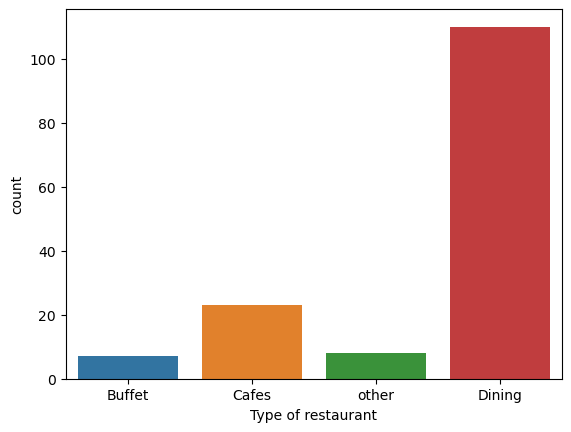

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel("Type of restaurant")  # Corrected function name
plt.show()


# conclusion - majority of the resturant falls in dinning category

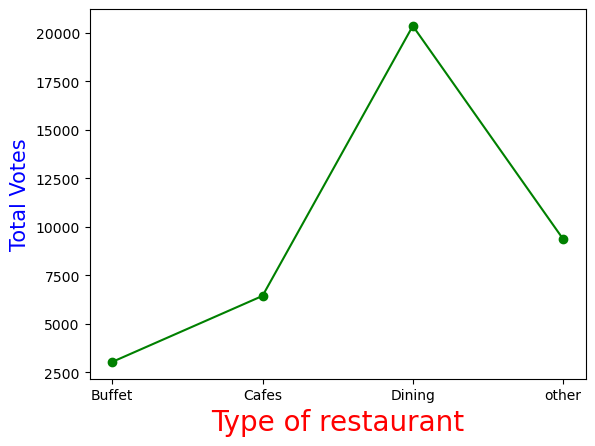

In [21]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)  # Corrected function
plt.ylabel("Total Votes", c="blue", size=15)  # Optional for clarity
plt.show()

# conclusion - dinning resturant has recieved maximum votes

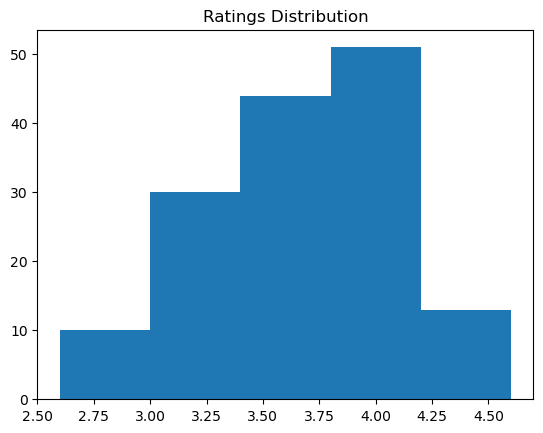

In [23]:
plt.hist(zomato['rate'],bins =5)
plt.title("Ratings Distribution")
plt.show()

# conclusion - the majority resturants received ratings from 3.5 to 4

# Average order spending by couples

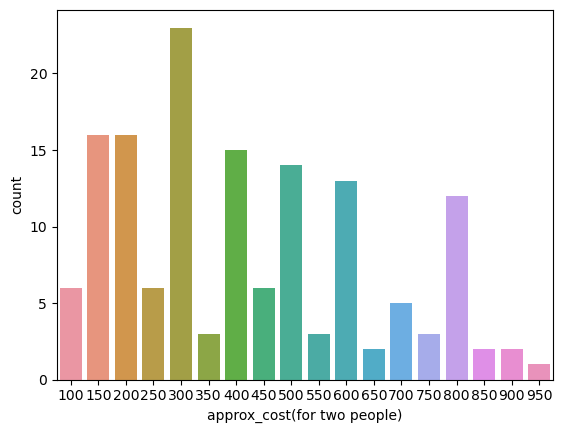

In [25]:
couple_data = zomato['approx_cost(for two people)']  # Use correct name
sns.countplot(x=couple_data)
plt.show()


# conclusion - the majority of couples preferr resturants with an approximate cost of 300 rupees

# which mode receives maximum rating 

<Axes: xlabel='online_order', ylabel='rate'>

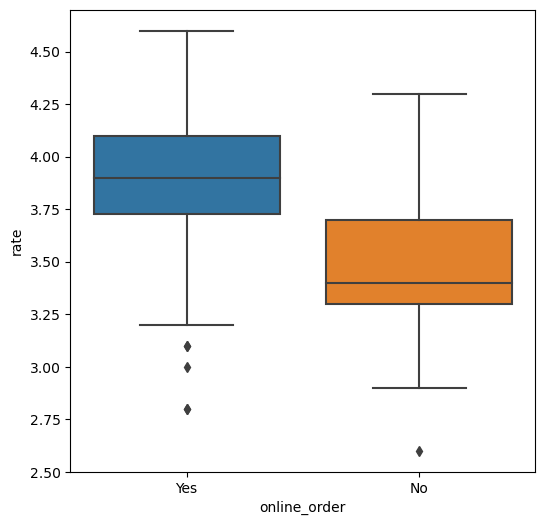

In [26]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = zomato)

# conclusion - offline order received lower rating in comparison to online order

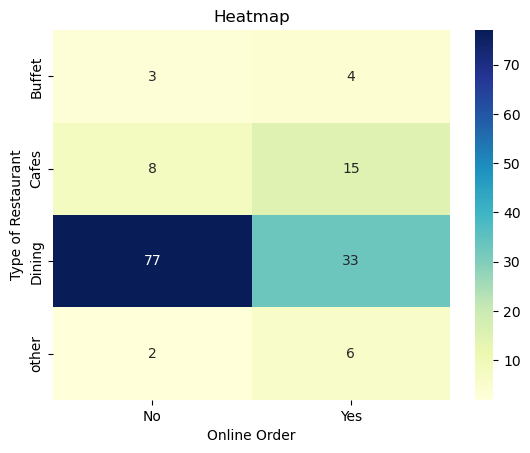

In [28]:
pivot_table = zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")  # Fixed typo
plt.ylabel("Type of Restaurant")

plt.show()

# CONCLUSION: DINING RESTAURANTS PRIMARILY ACCEPT OFFLINE ORDER WHEREAS CAFES PRIMARY RECEIVE ONLINE ORDER. THIS SUGGESTS THAT CLIENTS PREFERED TO UE ORDER IN PERSON AT RESTAURANTS,BUT PREFER ONLINE ORDERING AT CAFE.